# Implementing Portfolio Insurance (CPPI) and Drawdown Constraints

**Constant Proportion Portfolio Insurance (CPPI)**

In [4]:
%load_ext autoreload
%autoreload 2

import importlib, sys
import numpy as np
import pandas as pd

sys.path.insert(1, "../../week-one")

erk = importlib.import_module("edhec-risk-kit")

industry_returns = erk.get_industry_returns()

industry_returns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-three/section-one/../../week-one/edhec-risk-kit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_returns = pd.read_csv(


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [16]:
total_market_index = erk.get_total_market_index_returns()

total_market_index

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-three/section-one/../../week-one/edhec-risk-kit.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_nfirms = pd.read_csv(
/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-three/section-one/../../week-one/edhec-risk-kit.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_size = pd.read_csv(
/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-three/section-one/../../week-one/edhec-risk-kit.py:59: UserWarning: Could not infer format, 

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

In [17]:
# risky asset
risky_asset_return = industry_returns["2000":][["Steel", "Fin", "Beer"]]

risky_asset_return

,Steel,Fin,Beer
2000-01,-0.0277,-0.0442,-0.0228
2000-02,0.0684,-0.0849,-0.1164
2000-03,0.0349,0.1669,0.0013
2000-04,-0.0084,-0.0425,0.0368
2000-05,-0.0492,0.0506,0.1187
...,...,...,...
2018-08,-0.0323,0.0245,-0.0186
2018-09,-0.0067,-0.0193,0.0019
2018-10,-0.1161,-0.0545,-0.0157
2018-11,-0.0300,0.0289,0.0579


In [18]:
# safe asset
safe_asset_return = pd.DataFrame().reindex_like(risky_asset_return)

safe_asset_return.shape

(228, 3)

In [19]:
# approximately 3% a year
safe_asset_return[:] = 0.03 / 12

safe_asset_return

,Steel,Fin,Beer
2000-01,0.0025,0.0025,0.0025
2000-02,0.0025,0.0025,0.0025
2000-03,0.0025,0.0025,0.0025
2000-04,0.0025,0.0025,0.0025
2000-05,0.0025,0.0025,0.0025
...,...,...,...
2018-08,0.0025,0.0025,0.0025
2018-09,0.0025,0.0025,0.0025
2018-10,0.0025,0.0025,0.0025
2018-11,0.0025,0.0025,0.0025


In [20]:
start = 1000
# 80% of wealth / starting value / capital
floor = 0.8

1. Cushion - (Asset Value minus Floor Value)
2. Compute an allocation to Safe and Risky Assets --> $m * risk\ budget$
3. Recompute the Asset Value based on the returns

##### Little detour to explain for loops and why they should be pushed down to the most efficient method for running it - C programming language, numpy, or pandas

In [27]:
def compound(r):
    return (r + 1).prod() - 1

def log_compound(r):
    return np.exp(np.log(1 + r).sum()) - 1

def log_compound2(r):
    return np.expm1(np.log1p(r).sum())

In [28]:
compound(risky_asset_return)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [29]:
log_compound(risky_asset_return)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [30]:
%timeit compound(risky_asset_return)

409 μs ± 77.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
%timeit log_compound(risky_asset_return)


510 μs ± 18.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
%timeit log_compound2(risky_asset_return)

351 μs ± 36.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Back to CPPI

1. ##### Cushion - (Asset Value minus Floor Value)

In [34]:
dates = risky_asset_return.index
n_steps = len(dates)

# asset value or account value
account_value = start

floor_value = start * floor
multiplier = 3

account_history = pd.DataFrame().reindex_like(risky_asset_return)
# Asset Value - Floor Value
cushion_history = pd.DataFrame().reindex_like(risky_asset_return)
# weight in risky asset
risky_weight_history = pd.DataFrame().reindex_like(risky_asset_return)

for step in range(n_steps):
    cushion = (account_value - floor_value) / account_value

    risky_weight = multiplier * cushion
    risky_weight = np.minimum(risky_weight, 1)
    risky_weight = np.maximum(risky_weight, 0)

    safe_weight = 1 - risky_weight

    risky_allocation = account_value * risky_weight
    safe_allocation = account_value * safe_weight

    # update the account value for this timestamp
    account_value = risky_allocation * (1 + risky_asset_return.iloc[step]) + safe_allocation * (1 + safe_asset_return.iloc[step])

    # save the values so we can look at the history and plot it
    cushion_history.iloc[step] = cushion
    risky_weight_history.iloc[step] = risky_weight
    account_history.iloc[step] = account_value

In [35]:
account_history

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489
...,...,...,...
2018-08,1078.784329,2461.732061,4155.508933
2018-09,1073.786842,2414.220632,4163.404400
2018-10,979.057951,2282.645608,4098.038951
2018-11,964.047446,2348.614066,4335.315406


In [44]:
# how would our capital have grown if we invested only in risky assets
risky_wealth = start * (1 + risky_asset_return).cumprod()

## CPPI and Drawdown Constraints II

In [46]:
risky_wealth

,Steel,Fin,Beer
2000-01,972.300000,955.800000,977.200000
2000-02,1038.805320,874.652580,863.453920
2000-03,1075.059626,1020.632096,864.576410
2000-04,1066.029125,977.255232,896.392822
2000-05,1013.580492,1026.704346,1002.794650
...,...,...,...
2018-08,1306.624224,3283.129665,4629.014147
2018-09,1297.869842,3219.765263,4637.809274
2018-10,1147.187153,3044.288056,4564.995669
2018-11,1112.771539,3132.267981,4829.308918


<Axes: >

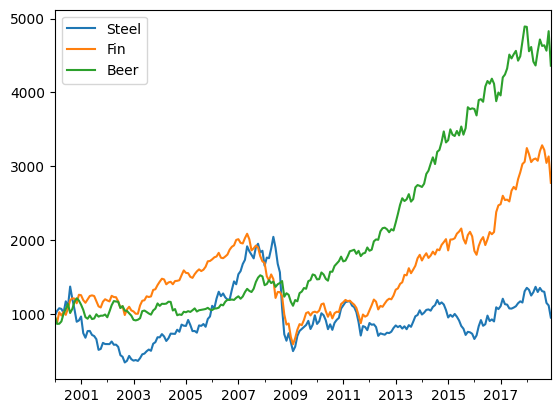

In [47]:
risky_wealth.plot()

In [48]:
account_history["Beer"]

2000-01     987.320000
2000-02     922.971256
2000-03     924.835988
2000-04     939.993701
2000-05     991.145489
              ...     
2018-08    4155.508933
2018-09    4163.404400
2018-10    4098.038951
2018-11    4335.315406
2018-12    3915.223343
Freq: M, Name: Beer, Length: 228, dtype: float64

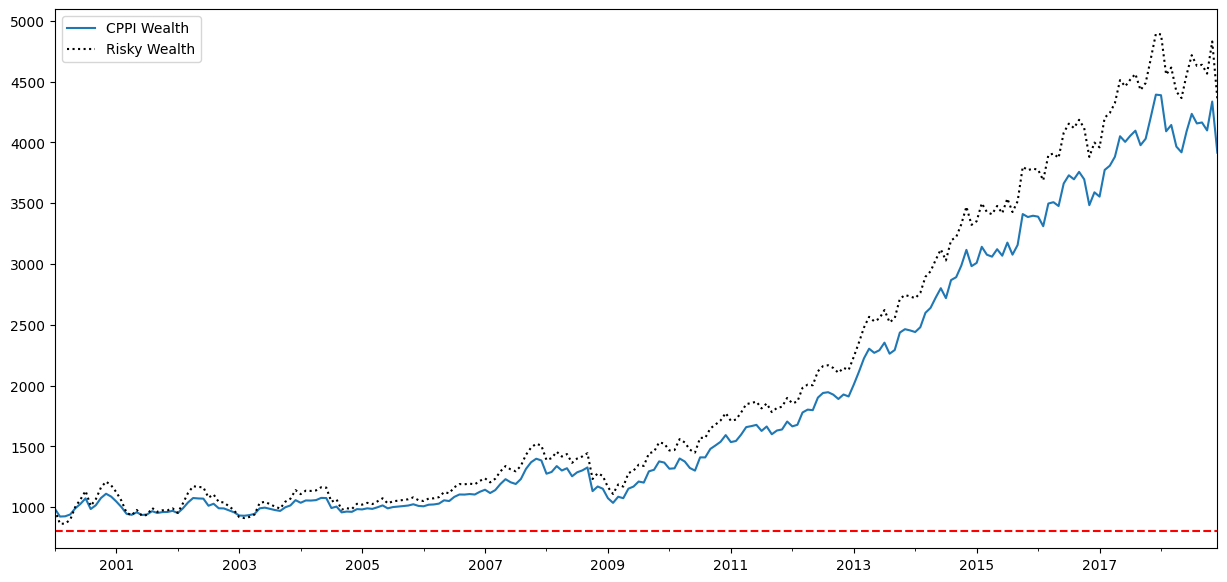

In [52]:
ax = account_history["Beer"].plot(label="CPPI Wealth", legend=True, figsize=(15, 7))

risky_wealth["Beer"].plot(ax=ax, label="Risky Wealth", legend=True, style="k:")

ax.axhline(y=floor_value, color="red", linestyle="--")

<Axes: >

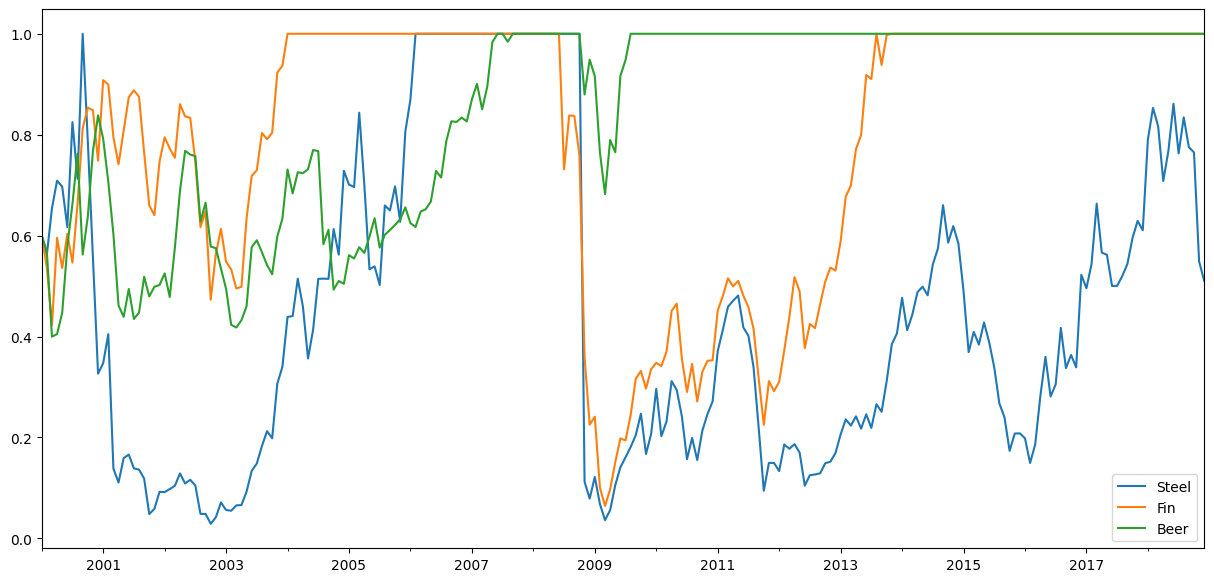

In [55]:
risky_weight_history.plot(figsize=(15, 7))

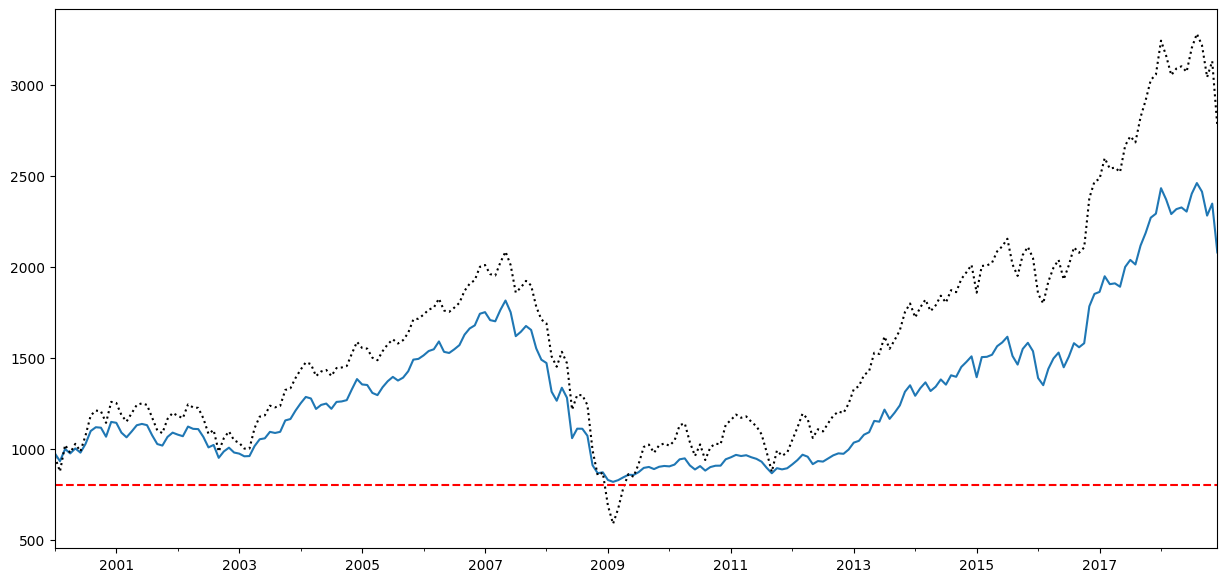

In [57]:
industry = "Fin"

ax = account_history[industry].plot(figsize=(15, 7))
risky_wealth[industry].plot(ax=ax, style="k:")

ax.axhline(y=floor_value, color='r', linestyle="--")

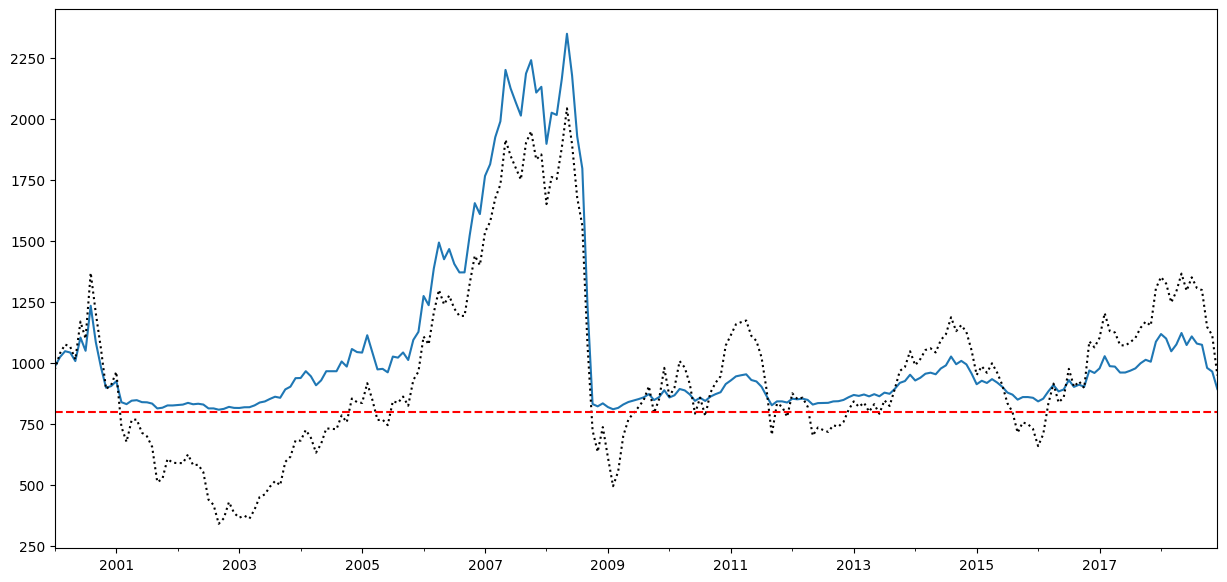

In [58]:
industry = "Steel"

ax = account_history[industry].plot(figsize=(15, 7))
risky_wealth[industry].plot(ax=ax, style="k:")

ax.axhline(y=floor_value, color='r', linestyle="--")

In [70]:
erk.summary_stats(risky_asset_return)

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.104972,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.130456,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.364213,-0.271368


In [71]:
backtest_results = erk.run_cppi(risky_asset_return)

backtest_results

{'Wealth':                Steel          Fin         Beer
 2000-01   984.380000   974.480000   987.320000
 2000-02  1023.292876   931.167544   922.971256
 2000-03  1047.555176   998.187296   924.835988
 2000-04  1042.079009   973.927479   939.993701
 2000-05  1007.137753  1001.460033   991.145489
 ...              ...          ...          ...
 2018-08  1078.784329  2461.732061  4155.508933
 2018-09  1073.786842  2414.220632  4163.404400
 2018-10   979.057951  2282.645608  4098.038951
 2018-11   964.047446  2348.614066  4335.315406
 2018-12   892.488571  2079.932617  3915.223343
 
 [228 rows x 3 columns],
 'Risky Wealth':                Steel          Fin         Beer
 2000-01   972.300000   955.800000   977.200000
 2000-02  1038.805320   874.652580   863.453920
 2000-03  1075.059626  1020.632096   864.576410
 2000-04  1066.029125   977.255232   896.392822
 2000-05  1013.580492  1026.704346  1002.794650
 ...              ...          ...          ...
 2018-08  1306.624224  3283.129665 

In [72]:
erk.summary_stats(backtest_results["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.201901,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.082735,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.394449,-0.259582


<Axes: >

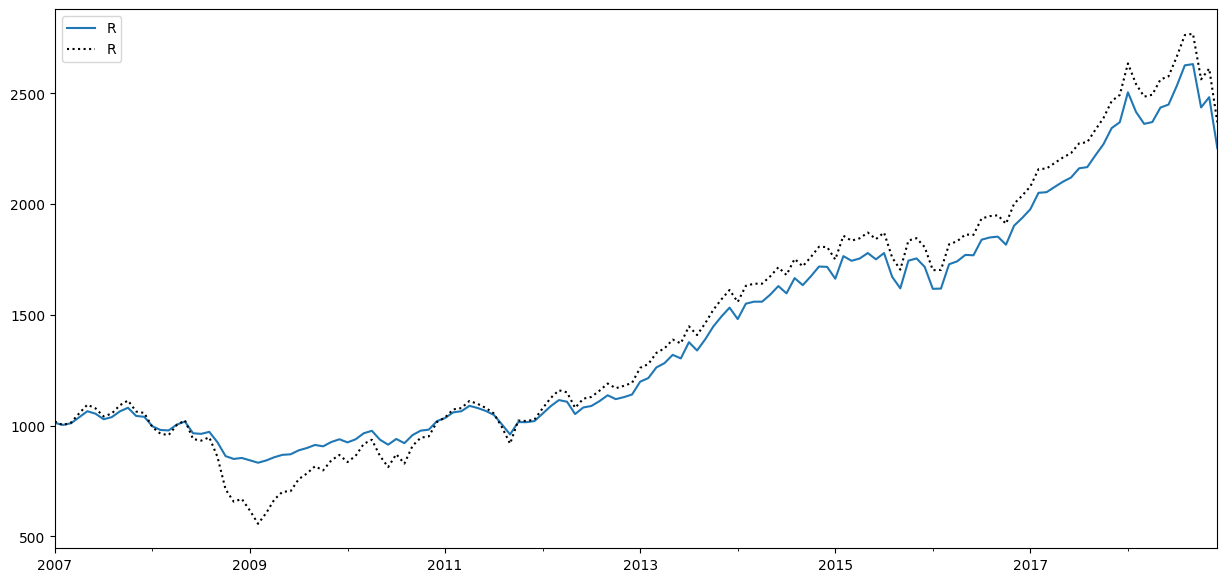

In [74]:
backtest_results = erk.run_cppi(total_market_index["2007":])

ax = backtest_results["Wealth"].plot(label="Wealth", legend=True, figsize=(15, 7))
backtest_results["Risky Wealth"].plot(ax=ax, label="Risky Wealth", legend=True, style="k:")


In [75]:
erk.summary_stats(backtest_results["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.288517,-0.499943


In [76]:
erk.summary_stats(backtest_results["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.392661,-0.229683


## Drawdown Constraint

In [82]:
backtest_results = erk.run_cppi(industry_returns["2007":][["Steel", "Fin", "Beer"]], drawdown=0.25)

backtest_results

{'Wealth':                Steel          Fin         Beer
 2007-01  1073.450000  1004.375000  1013.000000
 2007-02  1096.019286   986.170703   993.575725
 2007-03  1146.929382   984.234519  1011.702605
 2007-04  1176.720873  1010.390911  1049.001321
 2007-05  1270.917379  1033.301525  1076.485156
 ...              ...          ...          ...
 2018-08  1319.995348  1836.157052  2775.622234
 2018-09  1315.111116  1810.726277  2781.462432
 2018-10  1214.631424  1741.106042  2754.765204
 2018-11  1199.029336  1774.286676  2859.646850
 2018-12  1122.865227  1639.435264  2659.695775
 
 [144 rows x 3 columns],
 'Risky Wealth':                Steel          Fin         Beer
 2007-01  1097.100000  1005.000000  1016.500000
 2007-02  1126.941120   979.875000   989.664400
 2007-03  1195.797222   976.151475  1014.208077
 2007-04  1236.215169  1011.976234  1063.397169
 2007-05  1367.130355  1041.728335  1099.659012
 ...              ...          ...          ...
 2018-08   933.288944  1640.861855 

<Axes: >

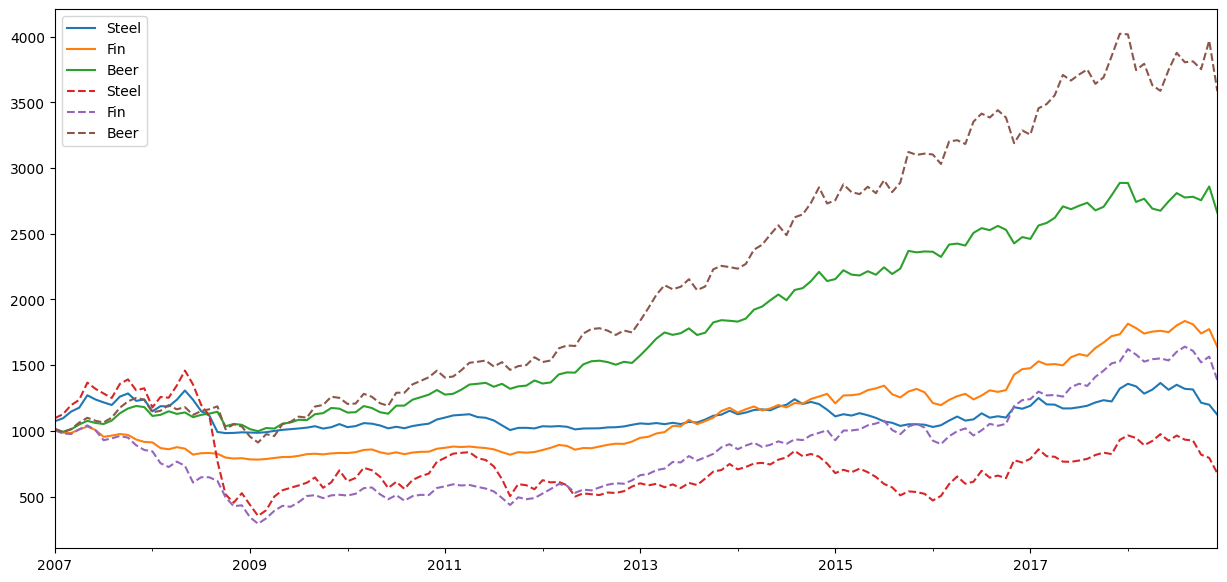

In [83]:
ax = backtest_results["Wealth"].plot(figsize=(15, 7), label="Wealth", legend=True)
backtest_results["Risky Wealth"].plot(ax=ax, style="--", label="Risky Wealth", legend=True)

In [84]:
erk.summary_stats(backtest_results["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.227344,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012423,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.637286,-0.271368


In [85]:
erk.summary_stats(backtest_results["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.270066,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.140833,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.630340,-0.161186
